In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('C:\\python\\github\\data\\pycon-2018-tutorial-master')
ri=pd.read_csv('police.csv')

In [16]:
ri.shape
ri.dtypes
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [19]:
#ri.drop('county_name',axis=1,inplace=True)
#or 
ri.dropna(how='all',axis=1,inplace=True)

In [20]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [27]:

#%age of men or women violation across each category
(ri.groupby('driver_gender')['violation'].value_counts()/len(ri))*100

driver_gender  violation          
F              Speeding               16.875770
               Moving violation        3.492441
               Equipment               2.710893
               Registration/plates     1.104196
               Other                   0.752117
               Seat belt               0.692166
M              Speeding               35.947940
               Moving violation       14.192128
               Equipment               9.301185
               Other                   3.953521
               Registration/plates     2.636771
               Seat belt               2.525588
Name: violation, dtype: float64

In [51]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [30]:
# percentage within each category 
ri.groupby('driver_gender')['violation'].value_counts(normalize=True)
#unstacking this 
ri.groupby('driver_gender')['violation'].value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


In [38]:
ri.columns
ri.groupby(['driver_gender','violation']).search_conducted.mean()*100

driver_gender  violation          
F              Equipment               4.262163
               Moving violation        3.620474
               Other                   5.652174
               Registration/plates     6.614018
               Seat belt               1.259843
               Speeding                0.871980
M              Equipment               7.008086
               Moving violation        5.983103
               Other                   4.714640
               Registration/plates    11.037619
               Seat belt               3.798015
               Speeding                2.492495
Name: search_conducted, dtype: float64

In [46]:
ri.search_type.str.contains('Frisk').sum()
ri.search_type.str.contains('Frisk').mean()

0.085732165206508129

In [57]:
# to slice the start data 
#ri.stop_date.str.slice(0,4).value_counts() 
# or we can use datetime dt.year function 
ri['stop_datetime']=pd.to_datetime(ri.stop_date.str.cat(ri.stop_time,sep=' '))
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

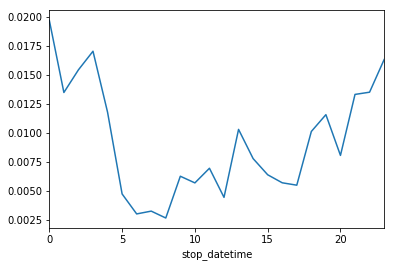

In [77]:
# group by drug activites by hour and plot it
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

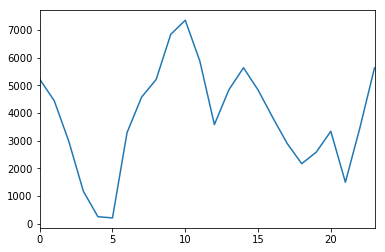

In [76]:
#no of stop occur at night
# sort by index as it defines time of the day
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

